### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 1

#### Дисциплина: Интеллектуальный анализ данных

##### Студент: Сатлихана Петрити
##### Группа:   НПИбд-02-21

**Примечание:** Я занимаюсь дистанционным обучением

## Москва 2024
***

### Вариант № 9

##### Abalone Data Set
##### Название файла: abalone.data
##### Ссылка: http://archive.ics.uci.edu/ml/datasets/Abalone

1. Используя функционал библиотеки Pandas, cчитайте заданный набор данных из репозитария UCI. Набор данных задан ссылкой на страницу набора данных и названием файла с данными, который доступен из папки с данными (data folder).

In [112]:
url = \
    "http://archive.ics.uci.edu/ml/" +\
    "machine-learning-databases/abalone/abalone.data"

In [113]:
import pandas as pd


In [114]:
columns = ['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']
data = pd.read_csv(url, header=None, names=columns)
print(data.head())

  Sex  Length  Diameter  Height  WholeWeight  ShuckedWeight  VisceraWeight  \
0   M   0.455     0.365   0.095       0.5140         0.2245         0.1010   
1   M   0.350     0.265   0.090       0.2255         0.0995         0.0485   
2   F   0.530     0.420   0.135       0.6770         0.2565         0.1415   
3   M   0.440     0.365   0.125       0.5160         0.2155         0.1140   
4   I   0.330     0.255   0.080       0.2050         0.0895         0.0395   

   ShellWeight  Rings  
0        0.150     15  
1        0.070      7  
2        0.210      9  
3        0.155     10  
4        0.055      7  


2.	Проведите исследование набора данных, выявляя числовые признаки. Если какие-то из числовых признаков были неправильно классифицированы, то преобразуйте их в числовые. Если в наборе для числовых признаков присутствуют пропущенные значения ('?'), то заполните их медианными значениями признаков.

In [115]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            4177 non-null   object 
 1   Length         4177 non-null   float64
 2   Diameter       4177 non-null   float64
 3   Height         4177 non-null   float64
 4   WholeWeight    4177 non-null   float64
 5   ShuckedWeight  4177 non-null   float64
 6   VisceraWeight  4177 non-null   float64
 7   ShellWeight    4177 non-null   float64
 8   Rings          4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None


На основании результатов data.info() все числовые объекты уже правильно классифицированы как float64 или int64. Это означает, что для числовых столбцов не требуется дальнейшего преобразования типов данных.






In [116]:
# Замените "?" на NaN
data.replace('?', pd.NA, inplace=True)
# Преобразование столбцов в числовые типы (за исключением столбца "Пол")
for col in columns[1:]:
    data[col] = pd.to_numeric(data[col])
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            4177 non-null   object 
 1   Length         4177 non-null   float64
 2   Diameter       4177 non-null   float64
 3   Height         4177 non-null   float64
 4   WholeWeight    4177 non-null   float64
 5   ShuckedWeight  4177 non-null   float64
 6   VisceraWeight  4177 non-null   float64
 7   ShellWeight    4177 non-null   float64
 8   Rings          4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None
  Sex  Length  Diameter  Height  WholeWeight  ShuckedWeight  VisceraWeight  \
0   M   0.455     0.365   0.095       0.5140         0.2245         0.1010   
1   M   0.350     0.265   0.090       0.2255         0.0995         0.0485   
2   F   0.530     0.420   0.135       0.6770         0.2565         0.1415   
3   M   0.440     0.365   0.1

*   Учитывая, что пропущенных значений нет, нет необходимости выполнять этап заполнения пропущенных значений медианой.

3.	Определите столбец, содержащий метку класса (отклик). Если столбец, содержащий метку класса (отклик), принимает более 10 различных значений, то выполните дискретизацию этого столбца, перейдя к 4-5 диапазонам значений.

In [117]:
# Идентификация метки класса "Rings"
print(data['Rings'].unique())

[15  7  9 10  8 20 16 19 14 11 12 18 13  5  4  6 21 17 22  1  3 26 23 29
  2 27 25 24]


In [118]:
num_unique_rings = data['Rings'].nunique()
print(num_unique_rings)

28


In [119]:
if num_unique_rings > 10:
    # Дискретизация столбца 'Rings' на 4 диапазона
    data['Rings_binned'] = pd.cut(data['Rings'], bins=4)
    print(data[['Rings', 'Rings_binned']].head())


   Rings  Rings_binned
0     15   (8.0, 15.0]
1      7  (0.972, 8.0]
2      9   (8.0, 15.0]
3     10   (8.0, 15.0]
4      7  (0.972, 8.0]


4.	При помощи класса SelectKBest библиотеки scikit-learn найдите в наборе два признака, имеющих наиболее выраженную взаимосвязь с (дискретизированным) столбцом с меткой класса (откликом). Используйте для параметра score_func значения chi2 или f_classif.

In [120]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import LabelEncoder

In [121]:
# Преобразование категориальный признак 'Sex' в числовой
label_encoder = LabelEncoder()
data['Sex_encoded'] = label_encoder.fit_transform(data['Sex'])

In [122]:
# Определение признаки и целевую переменную
X = data[['Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Sex_encoded']]
y = data['Rings_binned']

In [123]:
selector = SelectKBest(score_func=f_classif, k=2)
selector.fit(X, y)
# Получение и отображение результаты
scores = selector.scores_
columns = X.columns
top_features = sorted(zip(columns, scores), key=lambda x: x[1], reverse=True)[:2]
for feature, score in top_features:
    print(f"{feature}: {score}")

ShellWeight: 910.5833728832674
Diameter: 891.4572353844399


5.	Для найденных признаков и (дискретизированного) столбца с меткой класса (откликом) вычислите матрицу корреляций и визуализируйте ее в виде тепловой карты (heat map).

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [125]:
data['Rings_binned_encoded'] = data['Rings_binned'].cat.codes

In [126]:
# Признаки
features = ['ShellWeight', 'Diameter']
X = data[features + ['Rings_binned_encoded']]

In [127]:
corr_matrix = X.corr()
# Вычисление корреляционной матрицы
corr_matrix = X.corr()
print(corr_matrix)

                      ShellWeight  Diameter  Rings_binned_encoded
ShellWeight              1.000000  0.905330              0.620224
Diameter                 0.905330  1.000000              0.583407
Rings_binned_encoded     0.620224  0.583407              1.000000


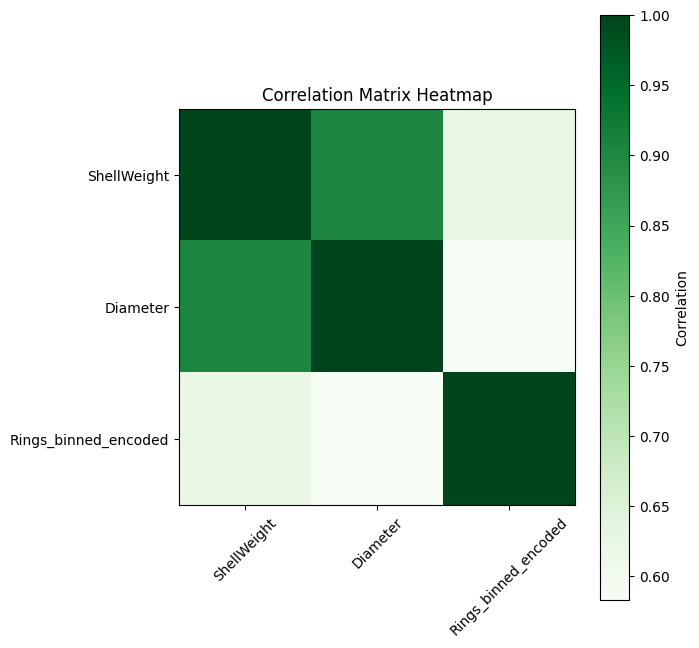

In [128]:
# тепловая карта
plt.figure(figsize=(7, 7))
plt.imshow(corr_matrix, cmap='Greens', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.index)), corr_matrix.index)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

6.	Визуализируйте набор данных в виде точек плоскости с координатами, соответствующими найденным признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

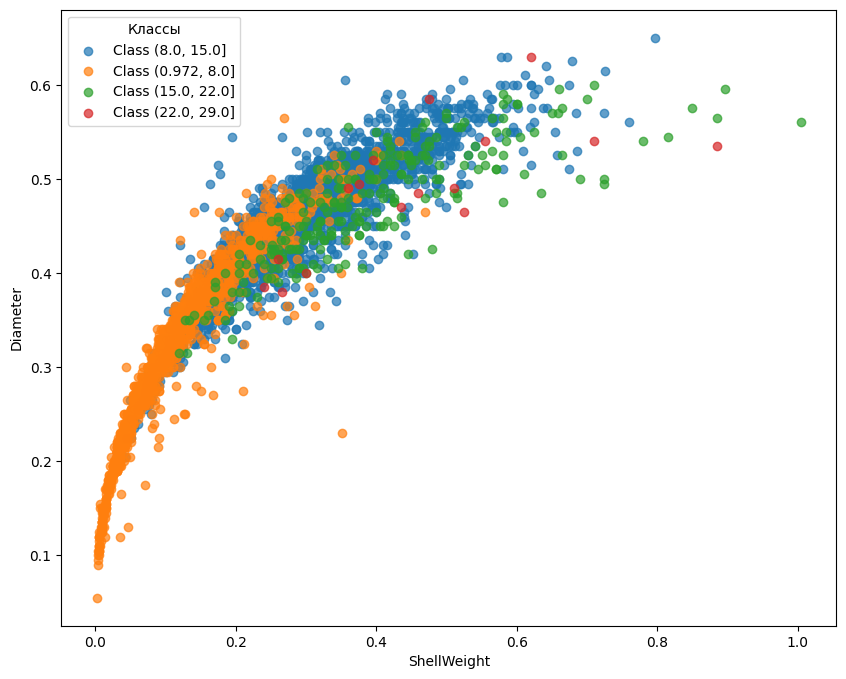

In [129]:
plt.figure(figsize=(10, 8))
for label in y.unique():
    plt.scatter(X[y == label][features[0]], X[y == label][features[1]],
                label=f'Class {label}', alpha=0.7)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend(title='Классы')
plt.show()

7.	Оставляя в наборе данных только числовые признаки, найдите и выведите на экран размерность метода главных компонент (параметр n_components), для которой доля объясняемой дисперсии будет не менее 97.5%.

In [130]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [131]:
# Загрузить данные
numeric_features = ['Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Sex_encoded']
X = data[numeric_features]
# Стандартизировать данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# PCA
pca = PCA()
pca.fit(X_scaled)
# Доля объясняемой дисперсии
explained_variance_ratio = pca.explained_variance_ratio_.cumsum()
# Определение минимального количества компонент для объяснения 97.5% дисперсии
n_components = (explained_variance_ratio >= 0.975).argmax() + 1
print(n_components)

4


8.	Пользуясь методом главных компонент (PCA), снизьте размерность набора данных до двух признаков и изобразите полученный набор данных в виде точек на плоскости, образованной двумя полученными признаками, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

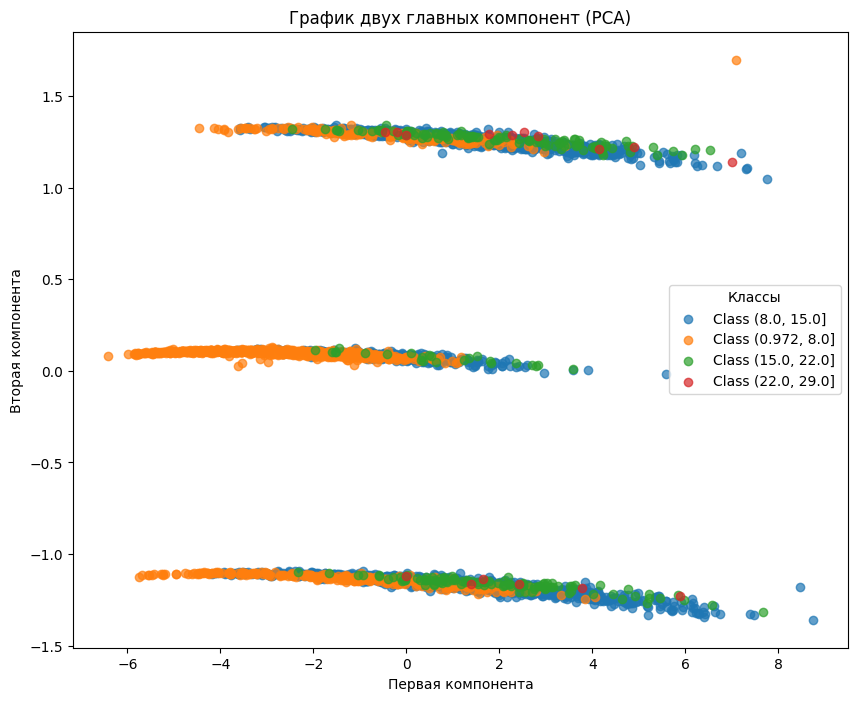

In [132]:
# Применение PCA для сокращения набора данных до двух компонентов
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)
# Визуализация данных на плоскости, образованной двумя главными компонентами
plt.figure(figsize=(10, 8))
for label in y.unique():
    plt.scatter(X_pca_2d[y == label, 0], X_pca_2d[y == label, 1],
                label=f'Class {label}', alpha=0.7)
plt.xlabel('Первая компонента')
plt.ylabel('Вторая компонента')
plt.title('График двух главных компонент (PCA)')
plt.legend(title='Классы')
plt.show()